In [218]:
# -*- coding: utf-8 -*-
"""
Regressão linear por caracterização 2018 x 2019
"""
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from math import pi
import scipy.stats as stats
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
from functools import wraps
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
 

'''
Funcao que tenta criar um subdiretorio conforme caminho informado no argumento
'''
def create_subdir(__path_name__):
    print('\n')
    print('------------------------------------------------------------------------')
    if os.path.isdir(__path_name__):
        print('AVISO: jah existe a pasta \'%s\' ' % __path_name__)
    else:    
        try:
            os.mkdir(__path_name__)
        except OSError:
            print('ERRO: Falha em criar a pasta %s' % __path_name__)
        else:
            print('SUCESSO: pasta \'%s\' criada com sucesso' % __path_name__)

    print('\n')

PLANILHA_QVAR_2018 = 'processadaQVAr.2018.csv'
PLANILHA_QVAR_2019 = 'processadaQVAr.2019.csv'
PLANILHA_CARAC_2018 = 'processadaCaracterizacaoQPA-E.2018.csv'
PLANILHA_CARAC_2019 = 'processadaCaracterizacaoQPA-E.2019.csv'
PLANILHA_ALUNOS = 'df_alunos.csv'



# Planilha de dados 
df_Qvar_2018 = pd.read_csv(PLANILHA_QVAR_2018, sep=',')
df_Qvar_2019 = pd.read_csv(PLANILHA_QVAR_2019, sep=',')
df_Carac_2018 = pd.read_csv(PLANILHA_CARAC_2018, sep=',', encoding='utf8')
df_Carac_2019 = pd.read_csv(PLANILHA_CARAC_2019, sep=',', encoding='utf8')
df_aluno = pd.read_csv(PLANILHA_ALUNOS, sep=',')


# Colummns not used
col_not_used = ['ID_PESSOA', 'NOME_PESSOA', 'SEXO', 'DT_NASCIMENTO',
                'FORMA_INGRESSO', 'FORMA_EVASAO', 'COD_CURSO', 'NOME_UNIDADE', 'NUM_VERSAO',
                'PERIODO_INGRESSO', 'DT_EVASAO', 'PERIODO_EVASAO', 'ANO_INGRESSO',
                'ANO_EVASAO', 'TEMPO_CURSO', 'PSELETIVO', 'IDADE_INGRESSO', 'CR_3P', 'CR_4P',
                'count_1P', 'count_2P', 'count_3P', 'TX_AP_3P', 'count_4P', 'TX_AP_4P',
                'N_MATR_2017','N_MATR_2018','N_MATR_2019',]

                
Qvar_2018 = df_Qvar_2018.drop(['Nome completo', 'dia', 'data', 'horário', 'Q0'], axis = 1)
Qvar_2019 = df_Qvar_2019.drop(['Nome completo', 'Data', 'Q0'], axis = 1)
df_Carac_2018 = df_Carac_2018.dropna(axis=0, subset=['MATR_ALUNO'])
df_Carac_2019 = df_Carac_2019.dropna(axis=0, subset=['MATR_ALUNO'])
df_aluno = df_aluno.drop(col_not_used, axis = 1)

df_Carac_2018['MATR_ALUNO'] = pd.to_numeric(df_Carac_2018['MATR_ALUNO'].astype(int))
df_Carac_2019['MATR_ALUNO'] = pd.to_numeric(df_Carac_2019['MATR_ALUNO'].astype(int))
Qvar_2018['MATR_ALUNO'] = pd.to_numeric(Qvar_2018['MATR_ALUNO'] ,errors='coerce')
Qvar_2019['MATR_ALUNO'] = pd.to_numeric(Qvar_2019['MATR_ALUNO'] ,errors='coerce')
df_aluno['MATR_ALUNO'] = pd.to_numeric(df_aluno['MATR_ALUNO'] ,errors='coerce')

# merges and joins
df_merge_carac_2018 = pd.merge(Qvar_2018, df_Carac_2018, on='MATR_ALUNO')
df_merge_carac_2019 = pd.merge(Qvar_2019, df_Carac_2019, on='MATR_ALUNO')
df_merge_2018 = pd.merge(Qvar_2018, df_aluno, on='MATR_ALUNO')
df_merge_2019 = pd.merge(Qvar_2019, df_aluno, on='MATR_ALUNO')

#Separate for factors

factor_pessoal = ['Q4','Q6','Q9','Q11','Q13','Q17','Q20','Q23','Q25','Q27','Q34','Q40','Q47','Q50']
factor_carreira = ['Q2','Q5','Q7','Q8','Q14','Q19','Q21','Q32','Q46','Q49','Q51','Q55']
factor_interpessoal = ['Q1','Q18','Q22','Q24','Q26','Q29','Q31','Q33','Q35','Q37','Q38','Q54']
factor_estudo = ['Q10','Q28','Q30','Q36','Q39','Q42','Q44','Q48','Q52']
factor_institucional = ['Q3','Q12','Q15','Q16','Q41','Q43','Q45','Q53']
fatores = ['pessoal', 'carreira', 'interpessoal', 'estudo', 'institucional']
factors = [factor_pessoal, factor_carreira, factor_interpessoal, factor_estudo, factor_institucional]
mean_factors = ['Mean pessoal','Mean carreira', 'Mean interpessoal', 'Mean estudo', 'Mean institucional']


#  ------- 2018 ---------

## Pessoal 

df_factor_pessoal_2018 = df_merge_2018.filter(['Q4','Q6','Q9','Q11','Q13','Q17','Q20','Q23','Q25','Q27','Q34','Q40','Q47','Q50','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'] , axis = 1) 
#  Averaging 
df_mean_factor_pessoal_2018 = np.mean(df_merge_2018.filter(factor_pessoal), axis = 1)
df_merge_2018['Mean pessoal'] = df_mean_factor_pessoal_2018

## Carreira

df_factor_carreira_2018 = df_merge_2018.filter(['Q2','Q5','Q7','Q8','Q14','Q19','Q21','Q32','Q46','Q49','Q51','Q55','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1) 
#  Averaging 
df_mean_factor_carreira_2018 = np.mean(df_merge_2018.filter(factor_carreira), axis = 1)
df_merge_2018['Mean carreira'] = df_mean_factor_carreira_2018

## Interpessoal
 
df_factor_interpessoal_2018 = df_merge_2018.filter(['Q1','Q18','Q22','Q24','Q26','Q29','Q31','Q33','Q35','Q37','Q38','Q54','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1)
#  Averaging 
df_mean_factor_interpessoal_2018 = np.mean(df_merge_2018.filter(factor_interpessoal), axis = 1)
df_merge_2018['Mean interpessoal'] = df_mean_factor_interpessoal_2018

## Estudo

df_factor_estudo_2018 = df_merge_2018.filter(['Q10','Q28','Q30','Q36','Q39','Q42','Q44','Q48','Q52','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1)
#  Averaging 
df_mean_factor_estudo_2018 = np.mean(df_merge_2018.filter(factor_estudo), axis = 1)
df_merge_2018['Mean estudo'] = df_mean_factor_estudo_2018

## institucional

df_factor_institucional_2018 = df_merge_2018.filter(['Q3','Q12','Q15','Q16','Q41','Q43','Q45','Q53','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1)
#  Averaging 
df_mean_factor_institucional_2018 = np.mean(df_merge_2018.filter(factor_institucional), axis = 1)
df_merge_2018['Mean institucional'] = df_mean_factor_institucional_2018

#  ------- 2019 ---------

## Pessoal 

df_factor_pessoal_2019 = df_merge_2019.filter(['Q4','Q6','Q9','Q11','Q13','Q17','Q20','Q23','Q25','Q27','Q34','Q40','Q47','Q50','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'] , axis = 1) 
#  Averaging 
df_mean_factor_pessoal_2019 = np.mean(df_merge_2019.filter(factor_pessoal), axis = 1)
df_merge_2019['Mean pessoal'] = df_mean_factor_pessoal_2019

## Carreira

df_factor_carreira_2019 = df_merge_2019.filter(['Q2','Q5','Q7','Q8','Q14','Q19','Q21','Q32','Q46','Q49','Q51','Q55','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1) 
#  Averaging 
df_mean_factor_carreira_2019 = np.mean(df_merge_2019.filter(factor_carreira), axis = 1)
df_merge_2019['Mean carreira'] = df_mean_factor_carreira_2019

## Interpessoal
 
df_factor_interpessoal_2019 = df_merge_2019.filter(['Q1','Q18','Q22','Q24','Q26','Q29','Q31','Q33','Q35','Q37','Q38','Q54','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1)
#  Averaging 
df_mean_factor_interpessoal_2019 = np.mean(df_merge_2019.filter(factor_interpessoal), axis = 1)
df_merge_2019['Mean interpessoal'] = df_mean_factor_interpessoal_2019

## Estudo

df_factor_estudo_2019 = df_merge_2019.filter(['Q10','Q28','Q30','Q36','Q39','Q42','Q44','Q48','Q52','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1)
#  Averaging 
df_mean_factor_estudo_2019 = np.mean(df_merge_2019.filter(factor_estudo), axis = 1)
df_merge_2019['Mean estudo'] = df_mean_factor_estudo_2019

## institucional

df_factor_institucional_2019 = df_merge_2019.filter(['Q3','Q12','Q15','Q16','Q41','Q43','Q45','Q53','CR_1P','CR_2P','TX_AP_1P','TX_AP_2P'], axis = 1)
#  Averaging 
df_mean_factor_institucional_2019 = np.mean(df_merge_2019.filter(factor_institucional), axis = 1)
df_merge_2019['Mean institucional'] = df_mean_factor_institucional_2019

In [232]:
# Regressão Linear Múltipla

fatores = ['Mean pessoal','Mean carreira', 'Mean interpessoal', 'Mean estudo', 'Mean institucional']

#função que seta os casos de treino e teste, tamanho do split de teste = 20%
def preprocessing(y, x): 
    XTrain, XTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)
    return XTrain, XTest, yTrain, yTest


#função que realiza o método BackwardElimination 
def computeAutomaticBackwardElimination(XTrain, yTrain, XTest, sl):
    import math as math
    XTrain = sm.add_constant(XTrain)
    XTest = sm.add_constant(XTest)
    
    size = XTrain.columns
    for i in range(len(size)):
        regressor_OLS = sm.OLS(yTrain, XTrain).fit()
        if (max(regressor_OLS.pvalues) > sl):
            for j in XTrain.columns:
                if(math.isclose(regressor_OLS.pvalues[j], max(regressor_OLS.pvalues)) == True):
                    XTrain = XTrain.drop(j, axis=1)
                    XTest = XTest.drop(j, axis=1)
    return XTrain, XTest

#função que cria o modelo de regressão linear múltipla com a biblioteca statsmodels.api
def RegressionOLS(yTrain, XTrain):  
    model = sm.OLS(yTrain, XTrain)
    results = model.fit()
    predictions = results.predict(XTrain)
    print(results.summary())
    return model, results, predictions

#função que cria o modelo regularizado
def RegressionRegularized(results, model):
    results_fr = model.fit_regularized(method='elastic_net', L1_wt=1.0, alpha=0.05, start_params=results.params)
    final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)
    print(final.summary())

                                 OLS Regression Results                                
Dep. Variable:                  CR_1P   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              369.3
Date:                Tue, 26 May 2020   Prob (F-statistic):                    5.84e-57
Time:                        12:07:55   Log-Likelihood:                         -181.26
No. Observations:                  99   AIC:                                      370.5
Df Residuals:                      95   BIC:                                      380.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Text(0, 0.5, 'Performance')

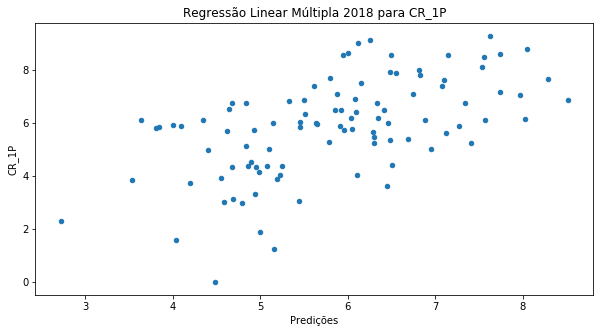

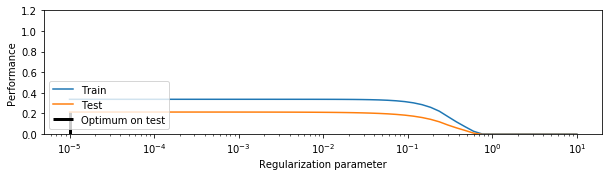

In [233]:
# 2018 (CR_1P como variável dependente)

# set the data
x = df_merge_2018[fatores]
y = df_merge_2018['CR_1P']


# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)

df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['CR_1P', 'Predições']) 

df.plot.scatter(x='Predições', y='CR_1P', figsize=(10,5), title='Regressão Linear Múltipla 2018 para CR_1P')

# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

                                 OLS Regression Results                                
Dep. Variable:                  CR_2P   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              185.2
Date:                Tue, 26 May 2020   Prob (F-statistic):                    8.67e-40
Time:                        12:08:13   Log-Likelihood:                         -212.46
No. Observations:                  99   AIC:                                      430.9
Df Residuals:                      96   BIC:                                      438.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Text(0, 0.5, 'Performance')

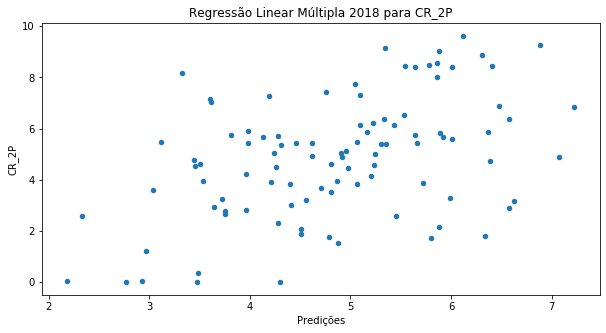

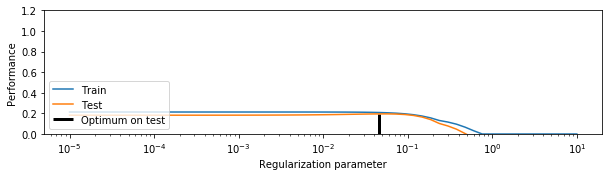

In [234]:
# 2018 (CR_2P como variável dependente)

# set the data
x = df_merge_2018[fatores]
y = df_merge_2018['CR_2P']


# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)

df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['CR_2P', 'Predições']) 

df.plot.scatter(x='Predições', y='CR_2P', figsize=(10,5), title='Regressão Linear Múltipla 2018 para CR_2P')


# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

                                 OLS Regression Results                                
Dep. Variable:               TX_AP_1P   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              266.7
Date:                Tue, 26 May 2020   Prob (F-statistic):                    2.03e-46
Time:                        12:08:24   Log-Likelihood:                          1.4725
No. Observations:                  99   AIC:                                      3.055
Df Residuals:                      96   BIC:                                      10.84
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Text(0, 0.5, 'Performance')

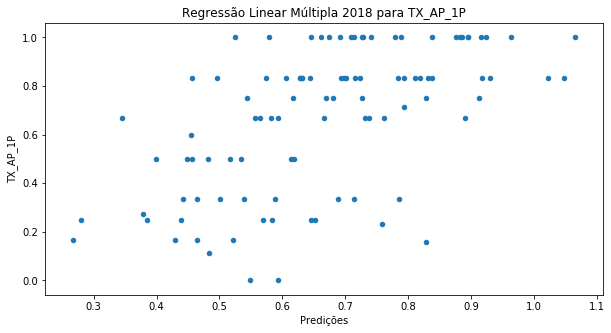

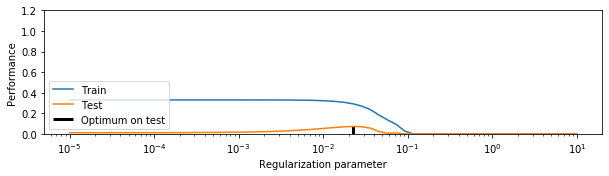

In [235]:
# 2018 (TX_AP_1P como variável dependente)

# set the data
x = df_merge_2018[fatores]
y = df_merge_2018['TX_AP_1P']


# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)

df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['TX_AP_1P', 'Predições']) 

df.plot.scatter(x='Predições', y='TX_AP_1P', figsize=(10,5), title='Regressão Linear Múltipla 2018 para TX_AP_1P')


# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

                                 OLS Regression Results                                
Dep. Variable:               TX_AP_2P   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              133.1
Date:                Tue, 26 May 2020   Prob (F-statistic):                    4.43e-34
Time:                        12:08:27   Log-Likelihood:                         -9.8805
No. Observations:                  99   AIC:                                      25.76
Df Residuals:                      96   BIC:                                      33.55
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Text(0, 0.5, 'Performance')

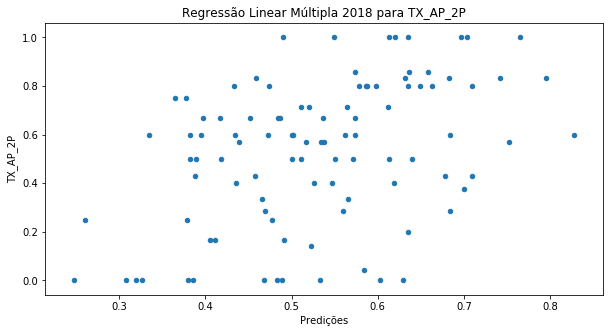

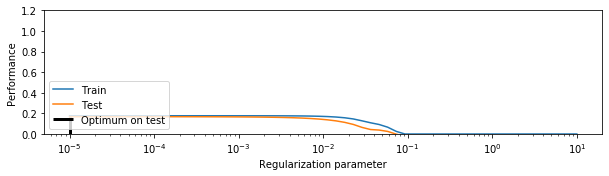

In [236]:
# 2018 (TX_AP_2P como variável dependente)

# set the data
x = df_merge_2018[fatores]
y = df_merge_2018['TX_AP_2P']


# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)


df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['TX_AP_2P', 'Predições']) 

df.plot.scatter(x='Predições', y='TX_AP_2P', figsize=(10,5), title='Regressão Linear Múltipla 2018 para TX_AP_2P')


# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

                            OLS Regression Results                            
Dep. Variable:                  CR_1P   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     8.063
Date:                Tue, 26 May 2020   Prob (F-statistic):            0.00540
Time:                        12:08:29   Log-Likelihood:                -222.96
No. Observations:                 110   AIC:                             449.9
Df Residuals:                     108   BIC:                             455.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.9083      0.706      5.539   

Text(0, 0.5, 'Performance')

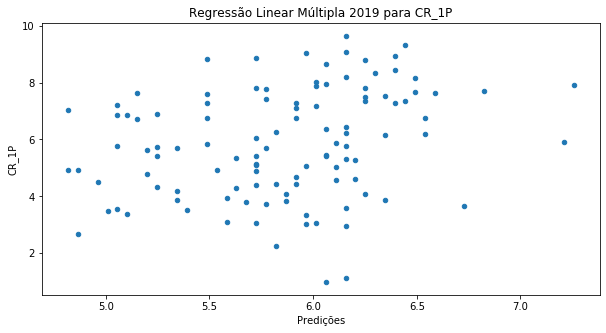

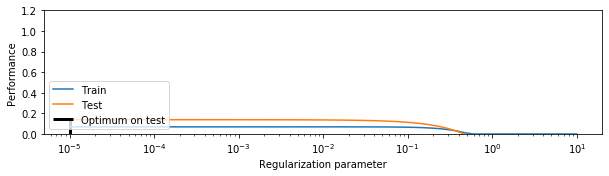

In [237]:
# 2019 (CR_1P como variável dependente)

# set the data
x = df_merge_2019[fatores]
y = df_merge_2019['CR_1P']


# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)

df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['CR_1P', 'Predições']) 

df.plot.scatter(x='Predições', y='CR_1P', figsize=(10,5), title='Regressão Linear Múltipla 2019 para CR_1P')

# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

                                 OLS Regression Results                                
Dep. Variable:                  CR_2P   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              301.3
Date:                Tue, 26 May 2020   Prob (F-statistic):                    6.58e-45
Time:                        12:08:31   Log-Likelihood:                         -240.85
No. Observations:                 110   AIC:                                      485.7
Df Residuals:                     108   BIC:                                      491.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Text(0, 0.5, 'Performance')

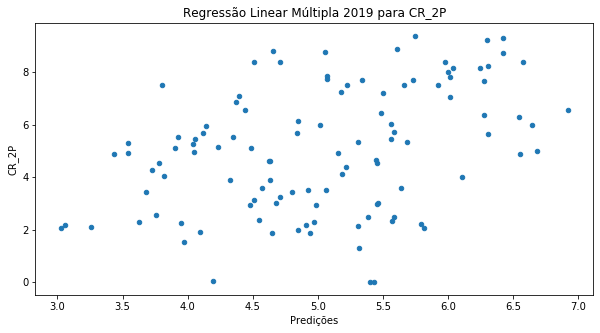

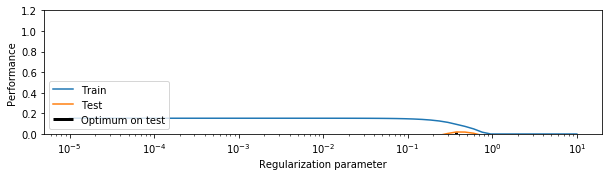

In [238]:
# 2019 (CR_2P como variável dependente)

# set the data
x = df_merge_2019[fatores]
y = df_merge_2019['CR_2P']


# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)

df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['CR_2P', 'Predições']) 

df.plot.scatter(x='Predições', y='CR_2P', figsize=(10,5), title='Regressão Linear Múltipla 2019 para CR_2P')


# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

                            OLS Regression Results                            
Dep. Variable:               TX_AP_1P   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.445
Date:                Tue, 26 May 2020   Prob (F-statistic):             0.0355
Time:                        12:10:19   Log-Likelihood:                -10.945
No. Observations:                 110   AIC:                             27.89
Df Residuals:                     107   BIC:                             35.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7265      0

Text(0, 0.5, 'Performance')

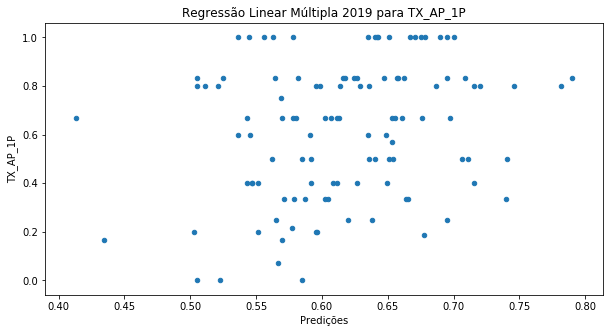

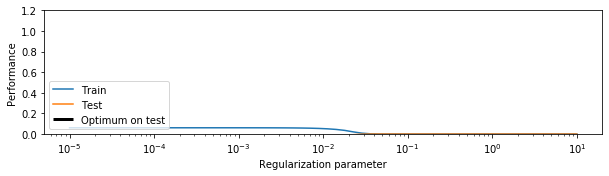

In [243]:
# 2019 (TX_AP_1P como variável dependente)

# set the data
x = df_merge_2019[fatores]
y = df_merge_2019['TX_AP_1P']

# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)

df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['TX_AP_1P', 'Predições']) 

df.plot.scatter(x='Predições', y='TX_AP_1P', figsize=(10,5), title='Regressão Linear Múltipla 2019 para TX_AP_1P')


# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

                                 OLS Regression Results                                
Dep. Variable:               TX_AP_2P   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                              372.8
Date:                Tue, 26 May 2020   Prob (F-statistic):                    5.78e-37
Time:                        12:08:34   Log-Likelihood:                         -29.836
No. Observations:                 110   AIC:                                      61.67
Df Residuals:                     109   BIC:                                      64.37
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Text(0, 0.5, 'Performance')

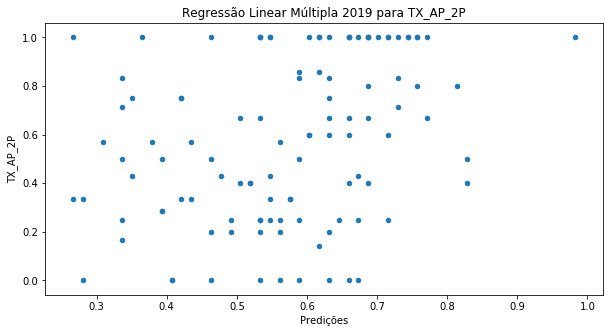

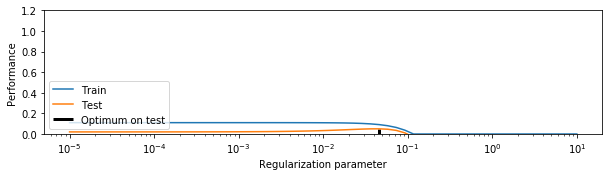

In [240]:
# 2019 (TX_AP_2P como variável dependente)

# set the data
x = df_merge_2019[fatores]
y = df_merge_2019['TX_AP_2P']


# Usando o modelo OLS e regularização Elastitc Net
XTrain, XTest, yTrain, yTest = preprocessing(y, x)
XTrain, XTest = computeAutomaticBackwardElimination(XTrain, yTrain, XTest, 0.05)

model, results, predictions = RegressionOLS(yTrain, XTrain)
RegressionRegularized(results, model)


df = pd.DataFrame(list(zip(yTrain, predictions)), 
               columns =['TX_AP_2P', 'Predições']) 

df.plot.scatter(x='Predições', y='TX_AP_2P', figsize=(10,5), title='Regressão Linear Múltipla 2019 para TX_AP_2P')


# Regularização Elastic Net da biblioteca SKlearn 

# Computa erros de treino e teste

alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(XTrain, yTrain)
    train_errors.append(enet.score(XTrain, yTrain))
    test_errors.append(enet.score(XTest, yTest))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# #############################################################################
# Plotando os resultados 

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')